# Problem formulation: 
>### * Differences between male and female in how they choose their mate
>### * Which variable has biggest impact on getting a date

# 1. Importing all the neccessary library and functions


In [62]:
import pandas as pd
import numpy as np
import seaborn as sb

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import make_scorer, fbeta_score
scorer = make_scorer(fbeta_score, beta=1.5)

In [4]:
%pylab inline
pd.set_option('display.max_rows', None)

Populating the interactive namespace from numpy and matplotlib


In [60]:
def verticleCanvas(size):
    f, ax = plt.subplots(1, 2, figsize=size)
    return [f, ax]

In [5]:
data = pd.read_csv("data/data.csv", encoding= 'ISO-8859-1')
print(data.shape[0], 'observations and', data.shape[1], 'features')

8378 observations and 195 features


In [6]:
data.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [7]:
print(data.shape)
data.dtypes.value_counts()

(8378, 195)


float64    174
int64       13
object       8
dtype: int64

In [8]:
print(data.isnull().sum())

iid            0
id             1
gender         0
idg            0
condtn         0
wave           0
round          0
position       0
positin1    1846
order          0
partner        0
pid           10
match          0
int_corr     158
samerace       0
age_o        104
race_o        73
pf_o_att      89
pf_o_sin      89
pf_o_int      89
pf_o_fun      98
pf_o_amb     107
pf_o_sha     129
dec_o          0
attr_o       212
sinc_o       287
intel_o      306
fun_o        360
amb_o        722
shar_o      1076
like_o       250
prob_o       318
met_o        385
age           95
field         63
field_cd      82
undergra    3464
mn_sat      5245
tuition     4795
race          63
imprace       79
imprelig      79
from          79
zipcode     1064
income      4099
goal          79
date          97
go_out        79
career        89
career_c     138
sports        79
tvsports      79
exercise      79
dining        79
museums       79
art           79
hiking        79
gaming        79
clubbing      

In [9]:
data.describe()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,...,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
mean,283.675937,8.960248,0.500597,17.327166,1.828837,11.350919,16.872046,9.042731,9.295775,8.927668,...,7.240312,8.093357,8.388777,7.658782,7.391545,6.810020,7.615079,7.932540,7.155258,7.048611
std,158.583367,5.491329,0.500029,10.940735,0.376673,5.995903,4.358458,5.514939,5.650199,5.477009,...,1.576596,1.610309,1.459094,1.744670,1.961417,1.507341,1.504551,1.340868,1.672787,1.717988
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,3.000000,2.000000,1.000000,2.000000,2.000000,4.000000,1.000000,1.000000
25%,154.000000,4.000000,0.000000,8.000000,2.000000,7.000000,14.000000,4.000000,4.000000,4.000000,...,7.000000,7.000000,8.000000,7.000000,6.000000,6.000000,7.000000,7.000000,6.000000,6.000000
50%,281.000000,8.000000,1.000000,16.000000,2.000000,11.000000,18.000000,8.000000,9.000000,8.000000,...,7.000000,8.000000,8.000000,8.000000,8.000000,7.000000,8.000000,8.000000,7.000000,7.000000
75%,407.000000,13.000000,1.000000,26.000000,2.000000,15.000000,20.000000,13.000000,14.000000,13.000000,...,8.000000,9.000000,9.000000,9.000000,9.000000,8.000000,9.000000,9.000000,8.000000,8.000000
max,552.000000,22.000000,1.000000,44.000000,2.000000,21.000000,22.000000,22.000000,22.000000,22.000000,...,12.000000,12.000000,12.000000,12.000000,12.000000,10.000000,10.000000,10.000000,10.000000,10.000000


# 2. First category extracting
            - What individuals look for ( Before )
            - What individuals rate their partner ( After )
   

## 2.1 Before the date attributes

In [88]:
#What individuals look for, before they have a date ( Before )
before_date_attribute = ['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']
before = data[before_date_attribute+['gender','match']]
before.head(5)

,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,gender,match
0,15.0,20.0,20.0,15.0,15.0,15.0,0,0
1,15.0,20.0,20.0,15.0,15.0,15.0,0,0
2,15.0,20.0,20.0,15.0,15.0,15.0,0,1
3,15.0,20.0,20.0,15.0,15.0,15.0,0,1
4,15.0,20.0,20.0,15.0,15.0,15.0,0,1


In [89]:
before.isnull().sum()

attr1_1      79
sinc1_1      79
intel1_1     79
fun1_1       89
amb1_1       99
shar1_1     121
gender        0
match         0
dtype: int64

### There are some missing values. From the similarties.ipynb, we already knew  79 missing values of `attr1_1`, `sinc1_1`, `intell1_1` are coming from same 79 rows. We will remove these 79 rows first then take a look further on `fun1_1`, `amb1_1`, `shar1_1`

In [90]:
before = before[before["attr1_1"].isnull() == False]
print(before.isnull().sum())
print("\n")
print("There are {} rows which are missing values".format(len(before[before.isnull().any(axis=1)])))

attr1_1      0
sinc1_1      0
intel1_1     0
fun1_1      10
amb1_1      20
shar1_1     42
gender       0
match        0
dtype: int64


There are 42 rows which are missing values


### So all the remaining missing values are all coming from 42 rows that are missing `shar1_1`. We will use foward-filling to fill the missing value since the variables are score, so we can assign the nearest datapoint value to the missing entries

In [91]:
before = before.fillna(method='ffill')
print("So there is {} row are missing value".format(before.isnull().sum().sum()))

So there is 0 row are missing value


### Now `before the date` dataset is cleaned. Now we are safe to do EDA on it

### Let's take the sum of score of each variables, and see the tendancy

In [56]:
before_male = before[before["gender"] == 1]
before_female = before[before["gender"] == 0]
before_male_sum = np.array(before_male.drop(["gender", "match"], axis = 1).sum())
before_female_sum = np.array(before_female.drop(["gender", "match"], axis = 1).sum())

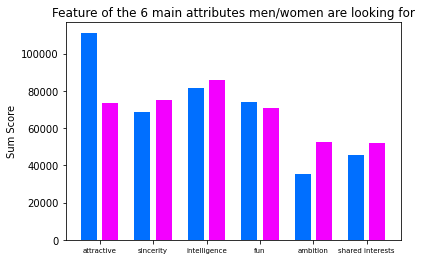

In [58]:
#Plot the 6 features ( Before )
attributes = plt.figure()
items = ('attractive', 'sincerity', 'intelligence','fun','ambition','shared interests')
y_pos = np.arange(len(items))

ax = plt.subplot(111)
ax.bar(y_pos-0.2, before_male_sum, width=0.3,color='#006FFF',align='center')
ax.bar(y_pos+0.2, before_female_sum, width=0.3,color='#F300FF',align='center')
plt.title("Feature of the 6 main attributes men/women are looking for")
plt.xticks(y_pos, items, fontsize = 7)
plt.ylabel("Sum Score")
plt.show()
# Seems like attractiveness is more important to men, and ambition is more of what a woman is looking for
#Pink - FEMALE
#Blue - Male

### This clearly showed that: male before the date want to have a attractive  partner while on a female, she tend to want someone is intelligent. But if every male only focus on the actractiveness then this variable become useless in deciding a men get a date or not.

Text(0.5, 1.0, 'Correlation matrix on Female')

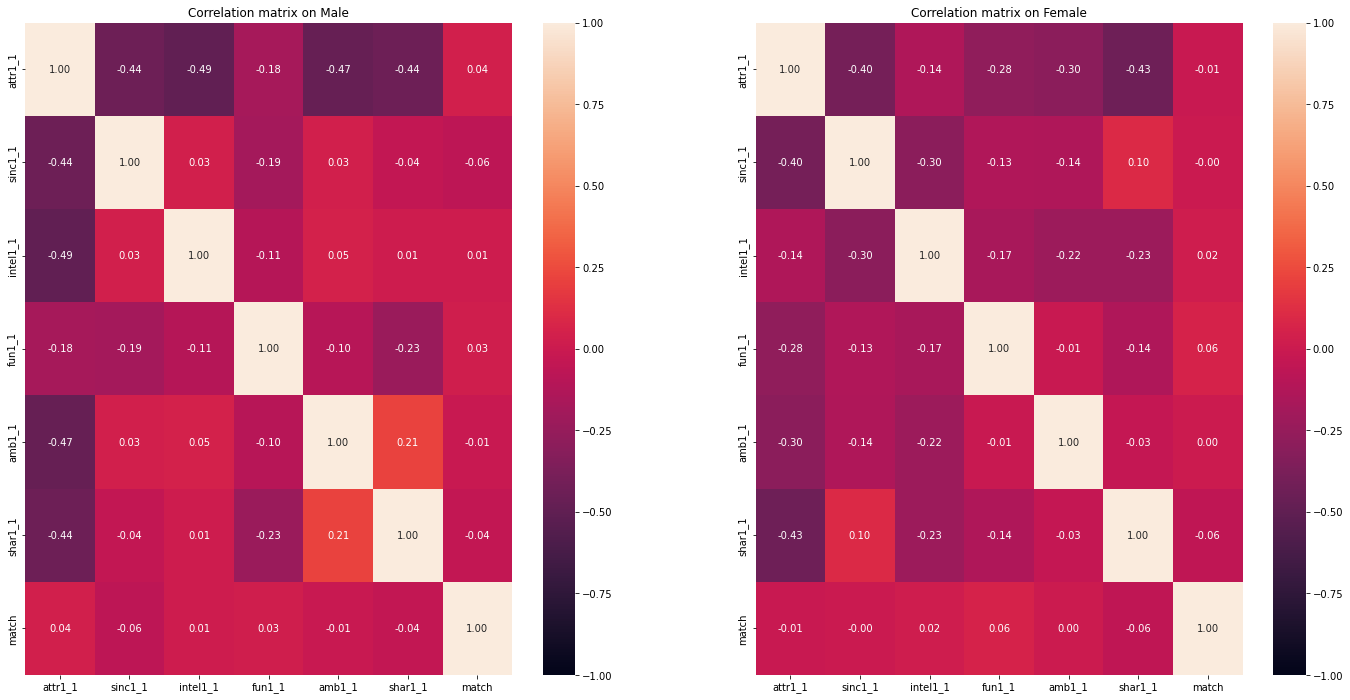

In [64]:
# Correlation of feature on both male and female before the date
f, ax = verticleCanvas((24, 12))
sb.heatmap(before_male.drop(["gender"],axis=1).corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f", ax = ax[0])
ax[0].set_title("Correlation matrix on Male")
sb.heatmap(before_female.drop(["gender"], axis=1).corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f", ax = ax[1])
ax[1].set_title("Correlation matrix on Female")

### Univariate exploring on each variable

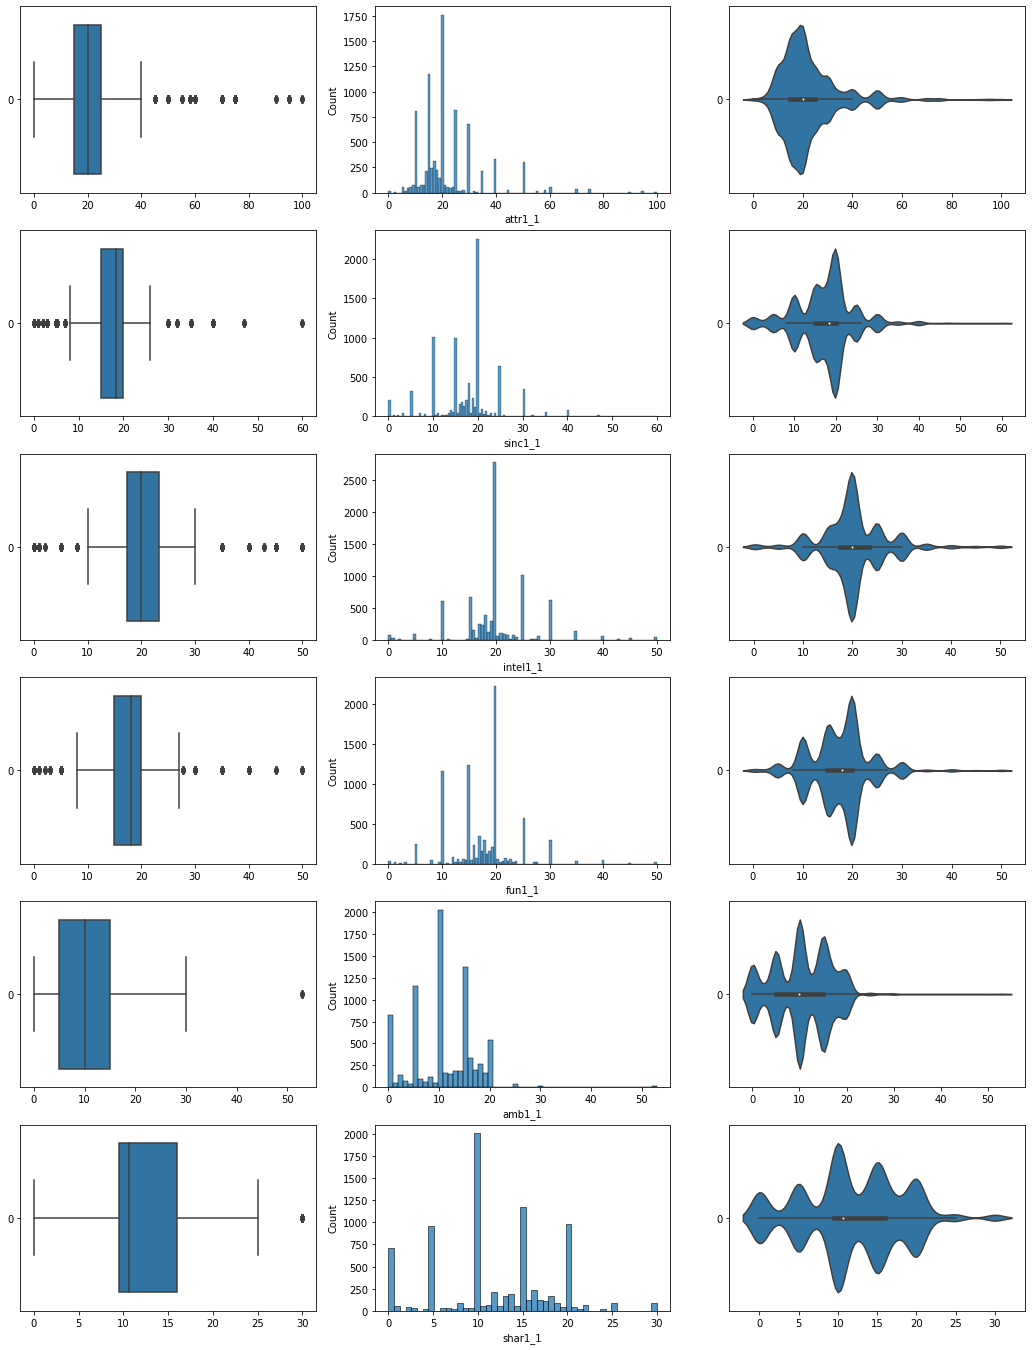

In [79]:
# Draw the distributions of all variables
f, axes = plt.subplots(6, 3, figsize=(18, 24))

count = 0
for var in before_date_attribute:
    sb.boxplot(data = before[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = before[var], ax = axes[count,1])
    sb.violinplot(data = before[var], orient = "h", ax = axes[count,2])
    count += 1

### *As we can see from the distribution, the variable `ambition` has lowest median, as well as 3rd quantile. Seems that everyone is underestimate the importance of `ambition` in relationship. 
### *`attractive` variable has many high outlier, again this imply that there are many people that overestimate this variable in relationship
### *`Sincere`, `Fun` and `Intelligent` have outliers on both side of the distribution. This is a good sign since the higher variance of variable, the higher chance it can be a "decisiveness" variable

### Now we will explore more on variable's distribution and their relationship with the `match` variable

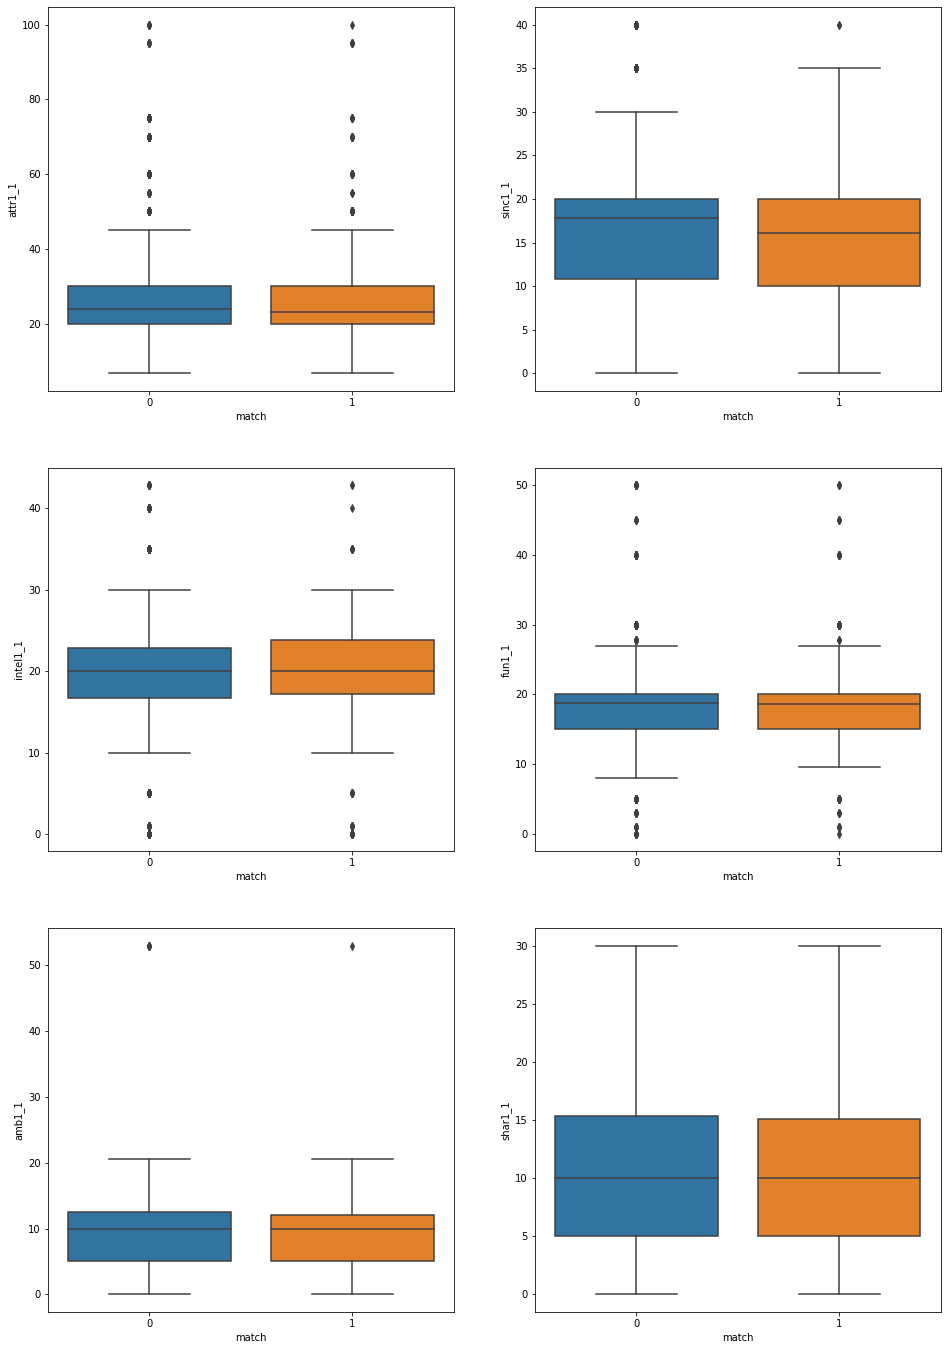

In [75]:
# before_date_attribute = ['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']
f, axes = plt.subplots(3,2, figsize = (16, 24))
count = 0
for var in before_date_attribute:
    levels = before_male["match"].unique()
    t = count//2
    sb.boxplot(y = var, x=before_male["match"], data = before, order = levels, ax = axes[t][count%2])
    count += 1

### We can see there is no significant difference in distribution of each variable accross `match` and `unmatch`. This may indicate that, these variables will not significant affect on the result of the date much for the male. Let's see there is anything different with female

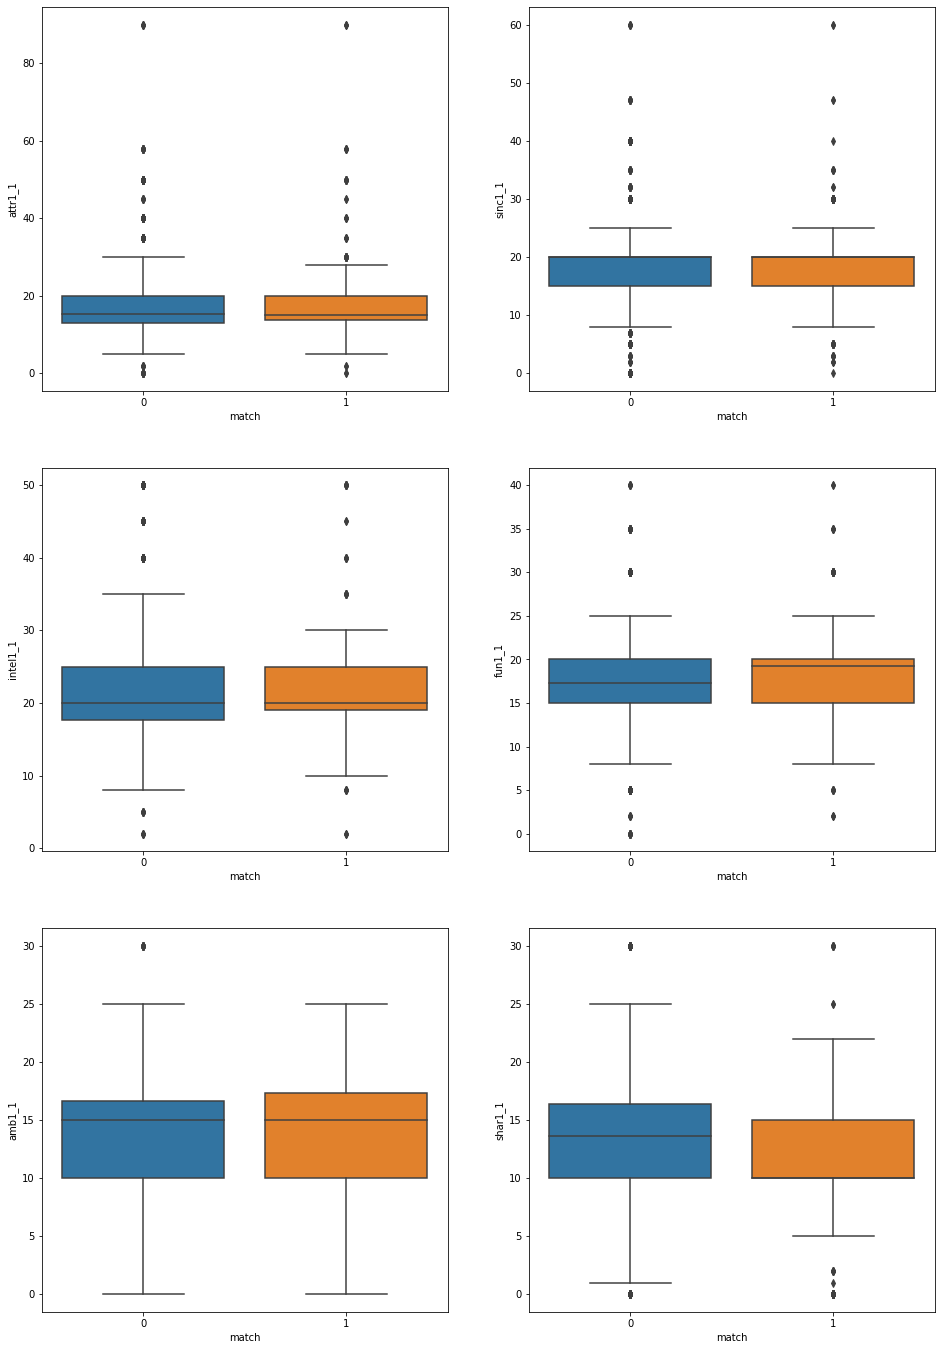

In [76]:
# before_date_attribute = ['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']
f, axes = plt.subplots(3,2, figsize = (16, 24))
count = 0
for var in before_date_attribute:
    levels = before_female["match"].unique()
    t = count//2
    sb.boxplot(y = var, x=before_female["match"], data = before, order = levels, ax = axes[t][count%2])
    count += 1

### We spotted that the variable `fun1_1` has `match` distribution higher then `non-match` distribution. This maybe a good variable in deciding a women get a date. Yet we still need to wait for the modeling for sure

### Extracting csv files for modeling

In [ ]:
before_male_msk = (before['gender'] == 1)
before_female_msk = (before['gender'] == 0)

before_male = before[before_male_msk]
before_female = before[before_female_msk]

#Exporting out male and female seperately for modelling
before_male.to_csv('attrBefore_male.csv')
before_female.to_csv('attrBefore_female.csv')

## 2.2 After the date attributes

In [98]:
#What individuals rate their partner ( After )
after_date_attribute = ['attr', 'sinc', 'intel', 'fun', 'amb', 'shar']
after = data[after_date_attribute+['gender','match']]
after.head(5)

,attr,sinc,intel,fun,amb,shar,gender,match
0,6.0,9.0,7.0,7.0,6.0,5.0,0,0
1,7.0,8.0,7.0,8.0,5.0,6.0,0,0
2,5.0,8.0,9.0,8.0,5.0,7.0,0,1
3,7.0,6.0,8.0,7.0,6.0,8.0,0,1
4,5.0,6.0,7.0,7.0,6.0,6.0,0,1


In [99]:
after.isnull().sum()

attr       202
sinc       277
intel      296
fun        350
amb        712
shar      1067
gender       0
match        0
dtype: int64

### Contradicting with the `before` dataset, this one has way many more missing values. Since the variables are score of each attribute so we can using foward-filling or backward-filling technique to refill the missing values. Here we used foward-filling to fill missing values

In [100]:
after.fillna(method='ffill', inplace=True)
print("There is {} missing value entry".format(after.isnull().sum().sum()))

There is 0 missing value entry


/Users/johntoro/opt/anaconda3/envs/Module1/lib/python3.7/site-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


### Now `before the date` dataset is cleaned. Now we are safe to do EDA on it

### Let's take the sum of score of each variables, and see the tendancy

In [101]:
after_male = after[after["gender"] == 1]
after_female = after[after["gender"] == 0]
after_male_sum = np.array(after_male.drop(["gender", "match"], axis = 1).sum())
after_female_sum = np.array(after_female.drop(["gender", "match"], axis = 1).sum())

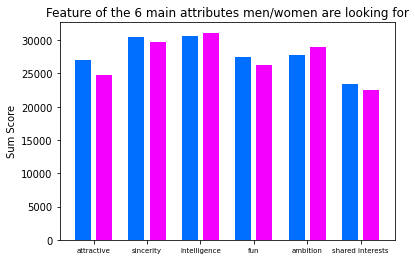

In [103]:
#Plot the 6 features ( After )
attributes = plt.figure()
items = ('attractive', 'sincerity', 'intelligence','fun','ambition','shared interests')
y_pos = np.arange(len(items))

ax = plt.subplot(111)
ax.bar(y_pos-0.2, after_male_sum, width=0.3,color='#006FFF',align='center')
ax.bar(y_pos+0.2, after_female_sum, width=0.3,color='#F300FF',align='center')
plt.title("Feature of the 6 main attributes men/women are looking for")
plt.xticks(y_pos, items, fontsize = 7)
plt.ylabel("Sum Score")
plt.show()
# Seems like attractiveness is more important to men, and ambition is more of what a woman is looking for
#Pink - FEMALE
#Blue - Male

### After the date: there is no a wide gap between male and female score anymore. Now their preference on partner are likely the same. They are both tend to notice on `intelligent` and `sincere` more than before.

Text(0.5, 1.0, 'Correlation matrix on Female')

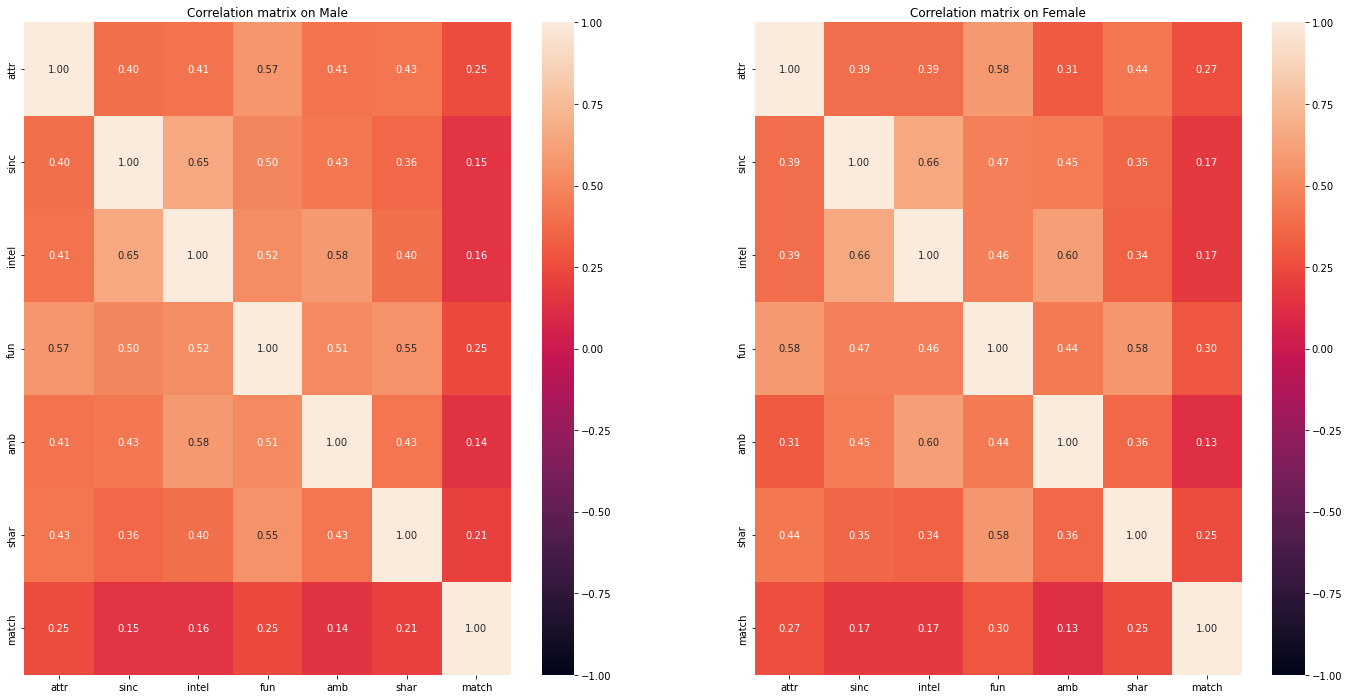

In [104]:
# Correlation of feature on both male and female before the date
f, ax = verticleCanvas((24, 12))
sb.heatmap(after_male.drop(["gender"],axis=1).corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f", ax = ax[0])
ax[0].set_title("Correlation matrix on Male")
sb.heatmap(after_female.drop(["gender"], axis=1).corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f", ax = ax[1])
ax[1].set_title("Correlation matrix on Female")

### Unlike the `before` dataset, variables of this one are positively correlated. This might imply these variables are helpful than the `before` attributes. Most of variable are correlated with `match` at least `0.15`

### Univariate exploring on each variable

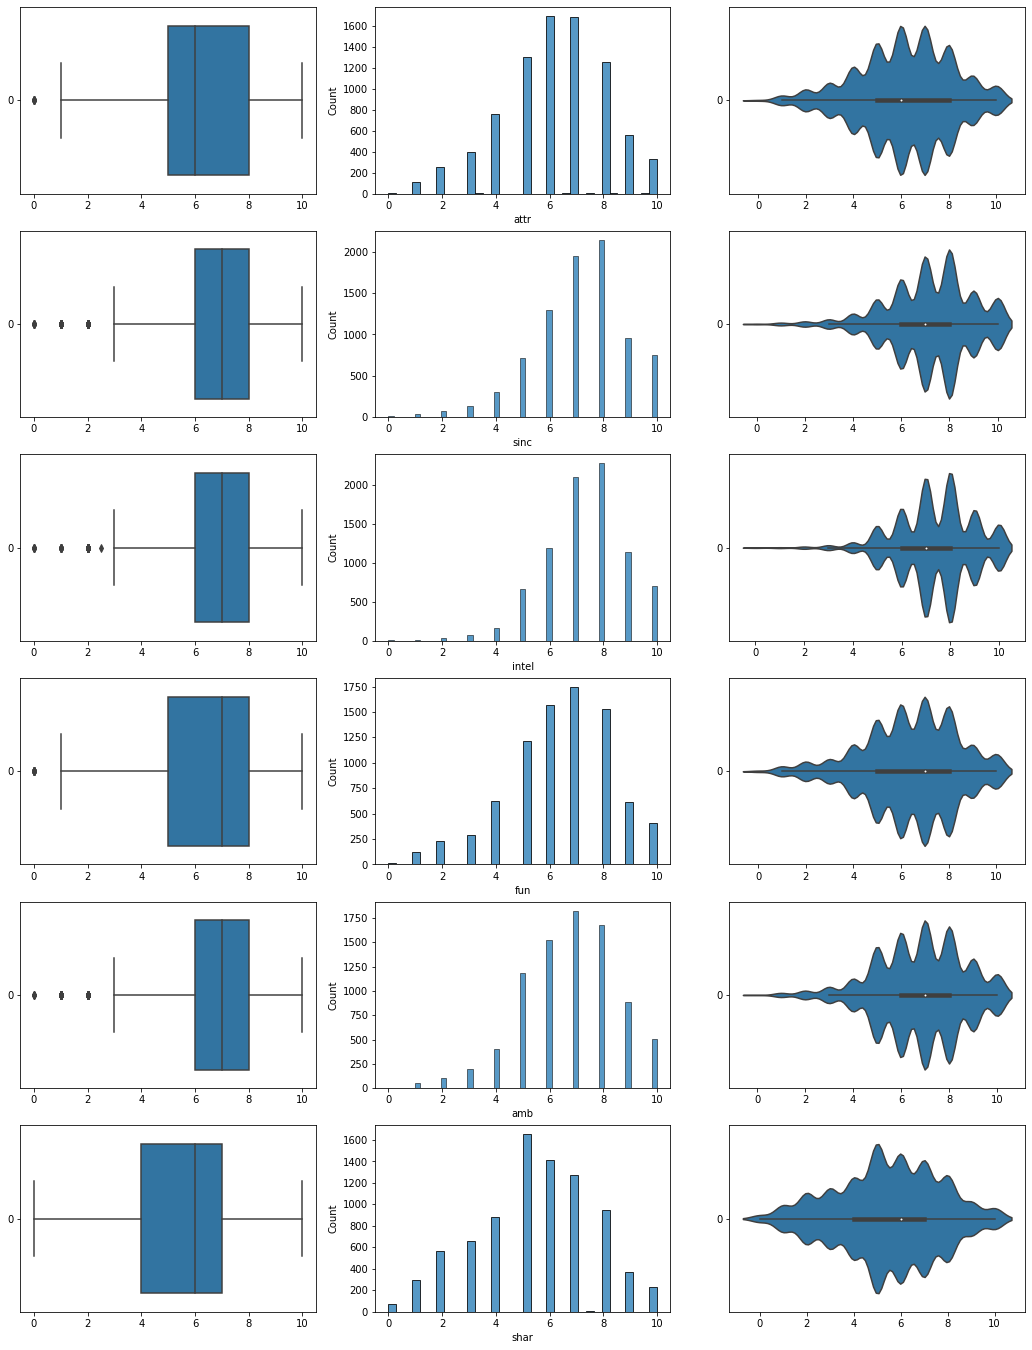

In [106]:
# Draw the distributions of all variables
f, axes = plt.subplots(6, 3, figsize=(18, 24))

count = 0
for var in after_date_attribute:
    sb.boxplot(data = after[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = after[var], ax = axes[count,1])
    sb.violinplot(data = after[var], orient = "h", ax = axes[count,2])
    count += 1

### Since the surveyed took these variable in different method with `before` dataset. `before` score are added up to maximum `100` while the `after` does not have any constraint of the sum, so all the distribution of variables are shifting toward the left. 
### Yet, ShareInterest still is underestimated, not many people rank it high. People are now focus on `sincere` and `intelligent` rather than `attractive` as before the date

### Now we will explore more on variable's distribution and their relationship with the `match` variable

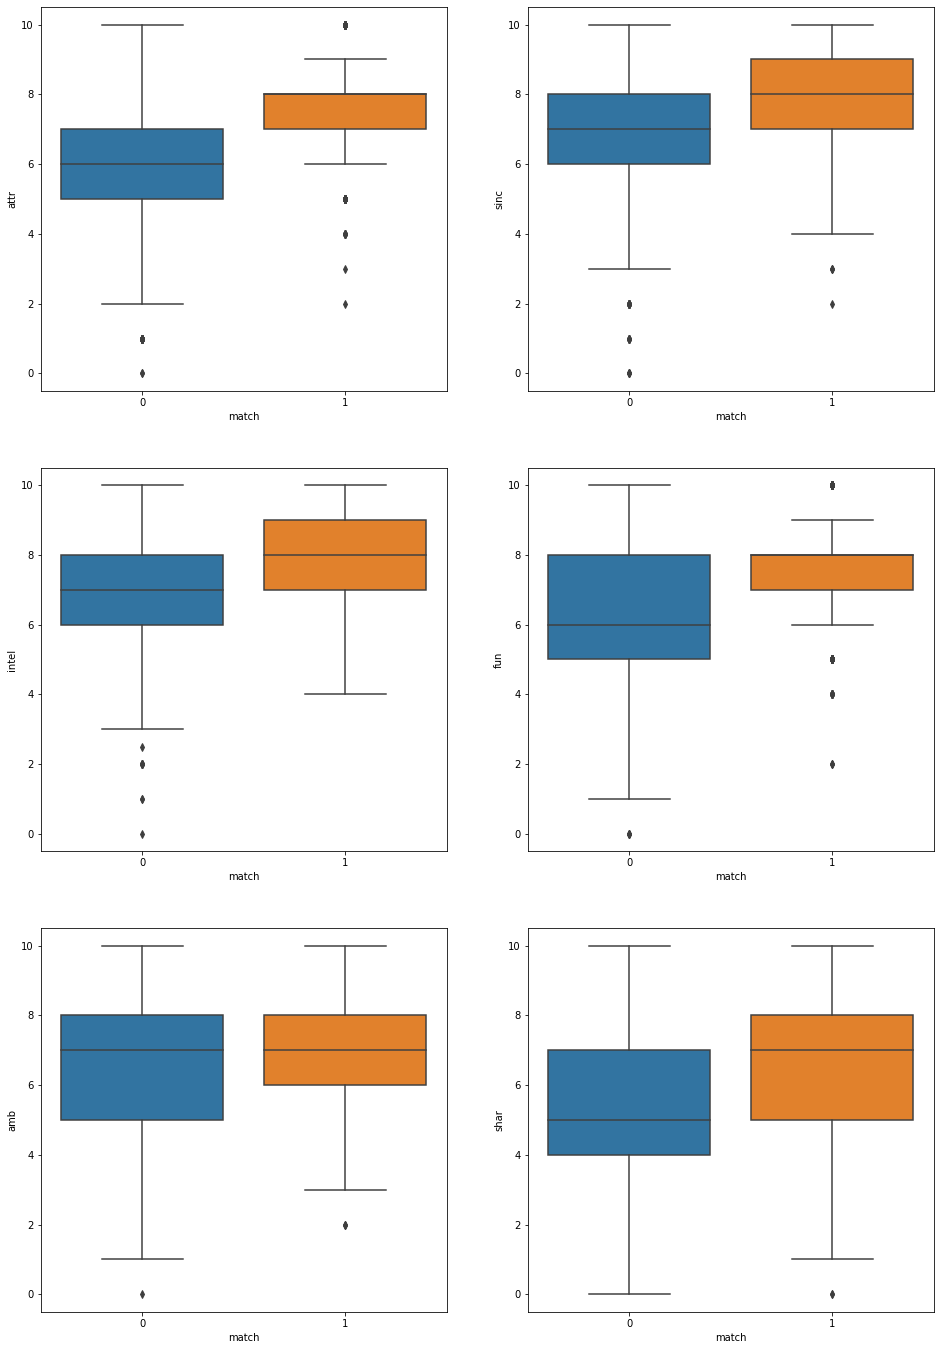

In [108]:
# after_date_attribute = ['attr', 'sinc', 'intel', 'fun', 'amb', 'shar']
f, axes = plt.subplots(3,2, figsize = (16, 24))
count = 0
for var in after_date_attribute:
    levels = after_male["match"].unique()
    t = count//2
    sb.boxplot(y = var, x=after_male["match"], data = after, order = levels, ax = axes[t][count%2])
    count += 1

### But when we explore with bivariate distribution, we can observe there are wide gaps between `match` and `unmatch` in `share interest`, `attractive`, `intelligent` and `sincere`. Unlike `before` attributes, these one have wider gap which is helpful in deciding a `match` or `unmatch` for a male

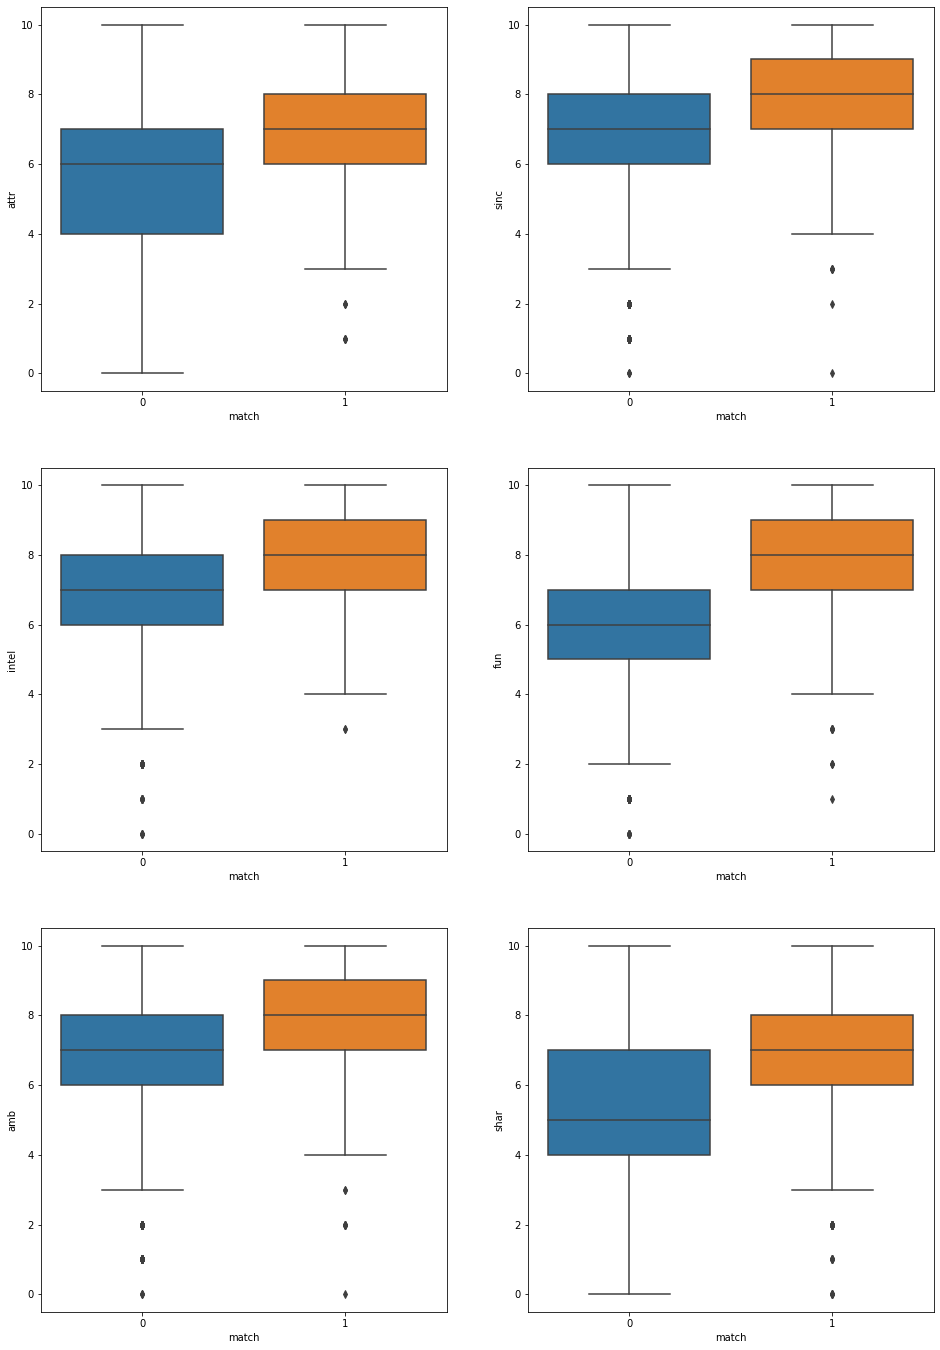

In [110]:
# before_date_attribute = ['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']
f, axes = plt.subplots(3,2, figsize = (16, 24))
count = 0
for var in after_date_attribute:
    levels = after_female["match"].unique()
    t = count//2
    sb.boxplot(y = var, x=after_female["match"], data = after, order = levels, ax = axes[t][count%2])
    count += 1

### Unlike the male, higher score on every attribute might indicate the high chance of getting a date for a female

### Extracting csv files for modeling

In [ ]:
### after_male_msk = (after['gender'] == 1)
after_female_msk = (after['gender'] == 0)

after_male = after[after_male_msk]
after_female = after[after_female_msk]

#Exporting out male and female seperately for modelling
after_male.to_csv('data/attrAfter_male.csv')
after_female.to_csv('data/attrAfter_female.csv')

# 3. satIncome variables
            - What is male and femlae preference on between education and income of partner
   

In [111]:
#counting the number of dropped NA values
satIncome = data[['income','mn_sat']].isna().sum()
satIncome

income    4099
mn_sat    5245
dtype: int64

In [112]:
#drop all NA values
satIncome = data[['mn_sat','income','gender','match']].dropna()

# Converting the object to int
satIncome['mn_sat'] = satIncome['mn_sat'].str.replace(',','').astype('float').astype('int')
satIncome['income'] = satIncome['income'].str.replace(',','').astype('float').astype('int')

#Creating log values to model
satIncome['log_mn_sat'] = np.log(satIncome['mn_sat'])
satIncome['log_income'] = np.log(satIncome['income'])

satIncome

,mn_sat,income,gender,match,log_mn_sat,log_income
3408,1070,44346,0,0,6.975414,10.699778
3409,1070,44346,0,0,6.975414,10.699778
3410,1070,44346,0,0,6.975414,10.699778
3411,1070,44346,0,0,6.975414,10.699778
3412,1070,44346,0,0,6.975414,10.699778
3413,1070,44346,0,0,6.975414,10.699778
3414,1070,44346,0,0,6.975414,10.699778
3415,1070,44346,0,0,6.975414,10.699778
3416,1070,44346,0,0,6.975414,10.699778
3426,1400,42225,0,0,7.244228,10.650768


In [113]:
#Seperating the second category male and female. 
mask_man = (satIncome['gender'] == 1)
mask_female = (satIncome['gender'] == 0)
male_second = satIncome[mask_man]
female_second = satIncome[mask_female]
male_second


,mn_sat,income,gender,match,log_mn_sat,log_income
3516,1140,41476,1,0,7.038784,10.632870
3517,1140,41476,1,0,7.038784,10.632870
3518,1140,41476,1,0,7.038784,10.632870
3519,1140,41476,1,0,7.038784,10.632870
3520,1140,41476,1,0,7.038784,10.632870
3521,1140,41476,1,0,7.038784,10.632870
3522,1140,41476,1,0,7.038784,10.632870
3523,1140,41476,1,0,7.038784,10.632870
3524,1140,41476,1,1,7.038784,10.632870
3534,1360,49841,1,0,7.215240,10.816593


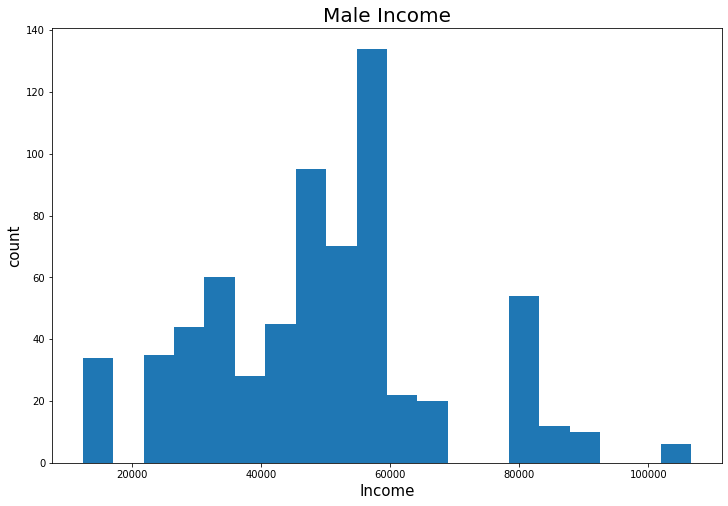

In [114]:
ax = male_second.income.hist(bins=20, figsize=(12,8))
ax.set_title('Male Income', fontsize=20)
ax.set_xlabel('Income', fontsize=15)
ax.set_ylabel('count', fontsize=15)
ax.grid(False)

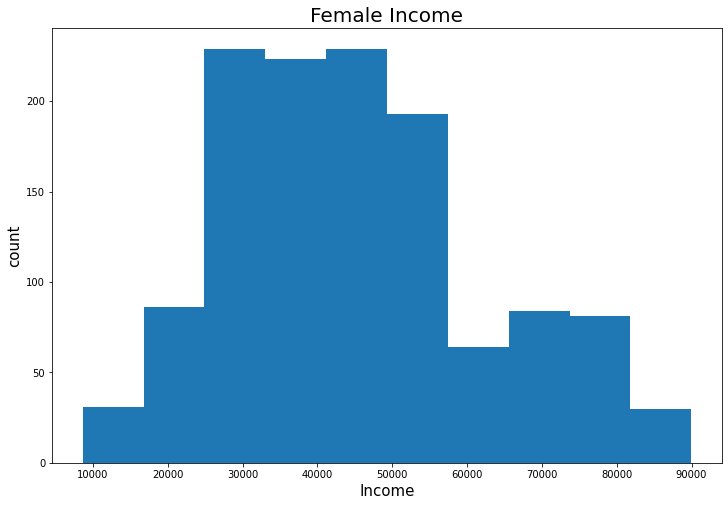

In [115]:
ax = female_second.income.hist(bins=10, figsize=(12,8))
ax.set_title('Female Income', fontsize=20)
ax.set_xlabel('Income', fontsize=15)
ax.set_ylabel('count', fontsize=15)
ax.grid(False)

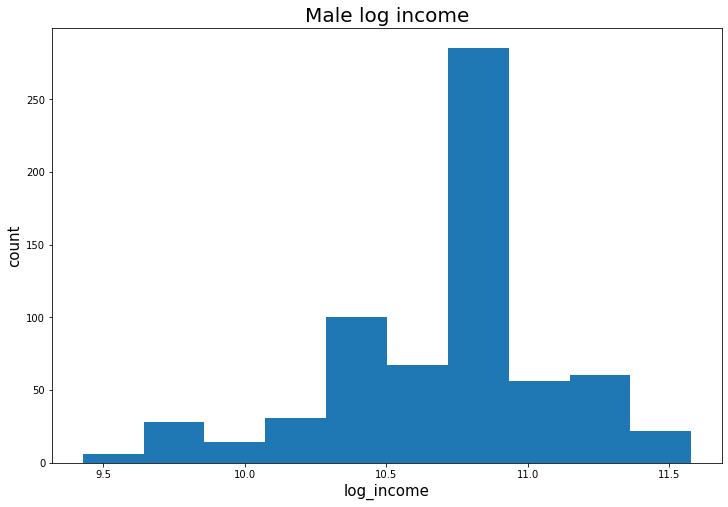

In [116]:
ax = male_second.log_income.hist(bins=10, figsize=(12,8))
ax.set_title('Male log income', fontsize=20)
ax.set_xlabel('log_income', fontsize=15)
ax.set_ylabel('count', fontsize=15)
ax.grid(False)

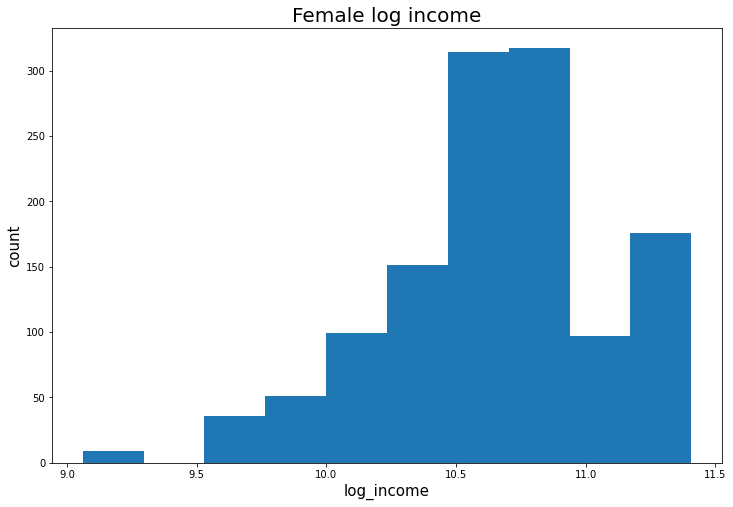

In [117]:
ax = female_second.log_income.hist(bins=10, figsize=(12,8))
ax.set_title('Female log income', fontsize=20)
ax.set_xlabel('log_income', fontsize=15)
ax.set_ylabel('count', fontsize=15)
ax.grid(False)

In [119]:
# Filtering out sat score, match and gender
sat_score = data[['mn_sat','match','gender']].dropna()
sat_score.shape
sat_score
# checking for entire SAT score of individuals

,mn_sat,match,gender
3408,"1,070.00",0,0
3409,"1,070.00",0,0
3410,"1,070.00",0,0
3411,"1,070.00",0,0
3412,"1,070.00",0,0
3413,"1,070.00",0,0
3414,"1,070.00",0,0
3415,"1,070.00",0,0
3416,"1,070.00",0,0
3417,"1,258.00",1,0


In [120]:
sat_score.dtypes #Check the mn_sat data type. it is object. We need to change to int/float

mn_sat    object
match      int64
gender     int64
dtype: object

In [121]:
# This is matched male data
male_sat= sat_score[(sat_score['match'] == 1) & (sat_score['gender'] == 1)]
male_sat

,mn_sat,match,gender
3490,"1,450.00",1,1
3496,"1,450.00",1,1
3497,"1,450.00",1,1
3502,"1,155.00",1,1
3512,"1,430.00",1,1
3524,"1,140.00",1,1
3535,"1,360.00",1,1
3541,"1,360.00",1,1
3542,"1,360.00",1,1
3555,"1,402.00",1,1


In [122]:
male_sat_score = male_sat.drop(['match', 'gender'], axis=1)
male_sat_score
#dropped_rdf.dtypes

,mn_sat
3490,"1,450.00"
3496,"1,450.00"
3497,"1,450.00"
3502,"1,155.00"
3512,"1,430.00"
3524,"1,140.00"
3535,"1,360.00"
3541,"1,360.00"
3542,"1,360.00"
3555,"1,402.00"


In [123]:
#Because data is object, we need convert to integer/float.. 
male_sat_score =  male_sat_score['mn_sat'].str.replace(',','').astype('float')
male_sat_score.dtypes


dtype('float64')

In [124]:
print("Male mean score", male_sat_score.mean())

# This is the mean of male SAT SCORE

Male mean score 1332.869109947644


## Lets find the female SAT score.. to see if they are intelligent..

In [125]:
#Gender = 0 because female
female_sat= sat_score[(sat_score['match'] == 1) & (sat_score['gender'] == 0)]
female_sat

,mn_sat,match,gender
3417,"1,258.00",1,0
3422,"1,258.00",1,0
3442,"1,290.00",1,0
3445,"1,460.00",1,0
3451,"1,460.00",1,0
3455,"1,430.00",1,0
3469,"1,215.00",1,0
3471,"1,330.00",1,0
3476,"1,330.00",1,0
3478,"1,330.00",1,0


In [126]:
female_sat_score = female_sat.drop(['match', 'gender'], axis=1)
female_sat_score

#Because data is object, we need convert to integer/float.. -.-
female_sat_score =  female_sat_score['mn_sat'].str.replace(',','').astype('float')
female_sat_score.dtypes

print("Female mean score", female_sat_score.mean())
#Mean of female score

Female mean score 1293.1864406779662


We can see that Male are more intelligent in this survey with mean score higher

In [127]:
#Because data is object, we need convert to integer/float.. -.-
#Run THIS LAST, for plotting
sat_score_int =  sat_score['mn_sat'].str.replace(',','').astype('float')
sat_score_int

3408    1070.0
3409    1070.0
3410    1070.0
3411    1070.0
3412    1070.0
3413    1070.0
3414    1070.0
3415    1070.0
3416    1070.0
3417    1258.0
3418    1258.0
3419    1258.0
3420    1258.0
3421    1258.0
3422    1258.0
3423    1258.0
3424    1258.0
3425    1258.0
3426    1400.0
3427    1400.0
3428    1400.0
3429    1400.0
3430    1400.0
3431    1400.0
3432    1400.0
3433    1400.0
3434    1400.0
3435    1290.0
3436    1290.0
3437    1290.0
3438    1290.0
3439    1290.0
3440    1290.0
3441    1290.0
3442    1290.0
3443    1290.0
3444    1460.0
3445    1460.0
3446    1460.0
3447    1460.0
3448    1460.0
3449    1460.0
3450    1460.0
3451    1460.0
3452    1460.0
3453    1430.0
3454    1430.0
3455    1430.0
3456    1430.0
3457    1430.0
3458    1430.0
3459    1430.0
3460    1430.0
3461    1430.0
3462    1215.0
3463    1215.0
3464    1215.0
3465    1215.0
3466    1215.0
3467    1215.0
3468    1215.0
3469    1215.0
3470    1215.0
3471    1330.0
3472    1330.0
3473    1330.0
3474    13

In [128]:
sat_score

match_sat_score= sat_score[(sat_score['match'] == 1)]
match_sat_score

#Converting Sat score to float 
match_sat_score['mn_sat']  = match_sat_score['mn_sat'].str.replace(',','').astype('float')
match_sat_score

/Users/johntoro/opt/anaconda3/envs/Module1/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,mn_sat,match,gender
3417,1258.0,1,0
3422,1258.0,1,0
3442,1290.0,1,0
3445,1460.0,1,0
3451,1460.0,1,0
3455,1430.0,1,0
3469,1215.0,1,0
3471,1330.0,1,0
3476,1330.0,1,0
3478,1330.0,1,0


In [129]:
#Map 1 to male 0 to female
match_sat_score['gender'] = match_sat_score.gender.map({1: 'Male', 0: 'Female'})

match_sat_score

/Users/johntoro/opt/anaconda3/envs/Module1/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,mn_sat,match,gender
3417,1258.0,1,Female
3422,1258.0,1,Female
3442,1290.0,1,Female
3445,1460.0,1,Female
3451,1460.0,1,Female
3455,1430.0,1,Female
3469,1215.0,1,Female
3471,1330.0,1,Female
3476,1330.0,1,Female
3478,1330.0,1,Female


<AxesSubplot:xlabel='mn_sat', ylabel='gender'>

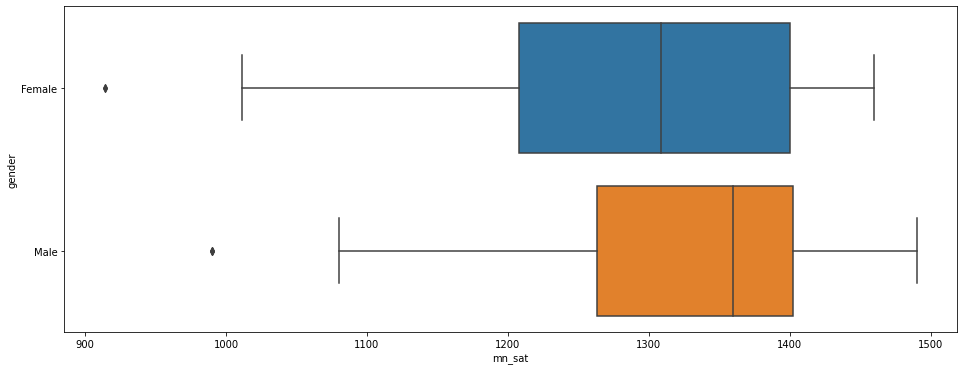

In [130]:
#Plotting the sat score, Female and male
# 1 is male , 2 is female

f = plt.figure(figsize=(16, 6))

sns.boxplot(x = 'mn_sat', y = 'gender', data = match_sat_score, orient = 'h')

### Extracting csv files for modeling

In [ ]:
#Exporting out to another notebook for modelling
male_second.to_csv("data/satIncome_male.csv")
female_second.to_csv("data/satIncome_female.csv")